In [1]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [2]:
def generate_ar_process(lags, coefs, length):
    
    # cast coefs to np array
    # these are the auto-regressive lag coefficients to previous states
    coefs = np.array(coefs)
    
    #initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        # get previous values of the series, reversed (most recent first)
        prev_vals = series[-lags:][::-1]
        
        # get new value of time series
        # uses the auto-regressive formula to create deterministic term and white-noise (innovation) term
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
        
        series.append(new_val)
        
    return np.array(series)

In [38]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print('Statistically Significant. Process is Stationary')
    else:
        print('Statistically Insignificant. Process is Non-Stationary')

Text(0.5, 1.0, 'Stationary AR(1) Process')

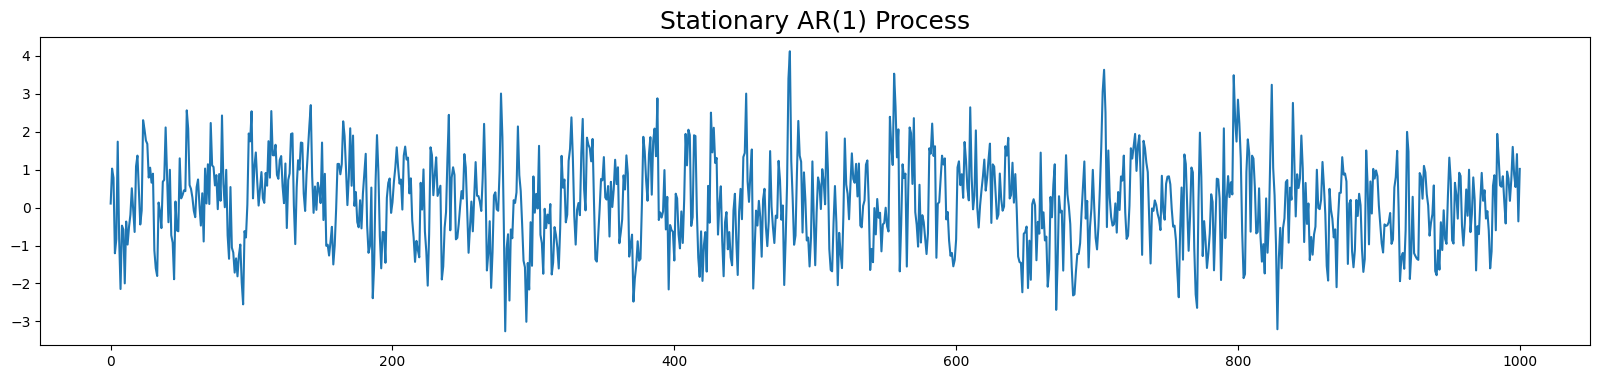

In [14]:
### AR(1) Processes (auto-regressive processes with a 1 time-period lag) ###

# Stationary Process
# because our coeffeicient here is < 1, we know it will converge
ar_1_process = generate_ar_process(1, [.5], 1000)
plt.figure(figsize=(20,4))
plt.plot(ar_1_process)
plt.title('Stationary AR(1) Process', fontsize=18)

In [39]:
perform_adf_test(ar_1_process)

ADF Statistic: -3.221610
p-value: 0.018767
Statistically Significant. Process is Stationary


Text(0.5, 1.0, 'Non-Stationary AR(1) Process')

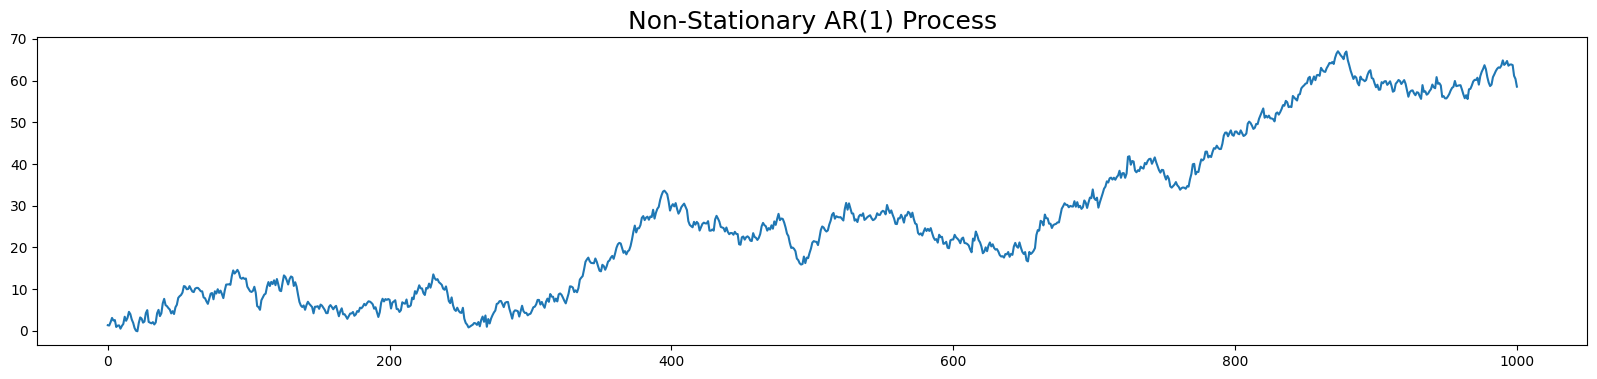

In [18]:
# non-Stationary Process
# because our coeffeicient here is == 1, we know there exists a unit root
ar_1_process_unit_root = generate_ar_process(1, [1.0], 1000)
plt.figure(figsize=(20,4))
plt.plot(ar_1_process_unit_root)
plt.title('Non-Stationary AR(1) Process', fontsize=18)

In [40]:
perform_adf_test(ar_1_process_unit_root)

ADF Statistic: 77220753455491216.000000
p-value: 1.000000
Statistically Insignificant. Process is Non-Stationary


Text(0.5, 1.0, 'Diverging AR(1) Process')

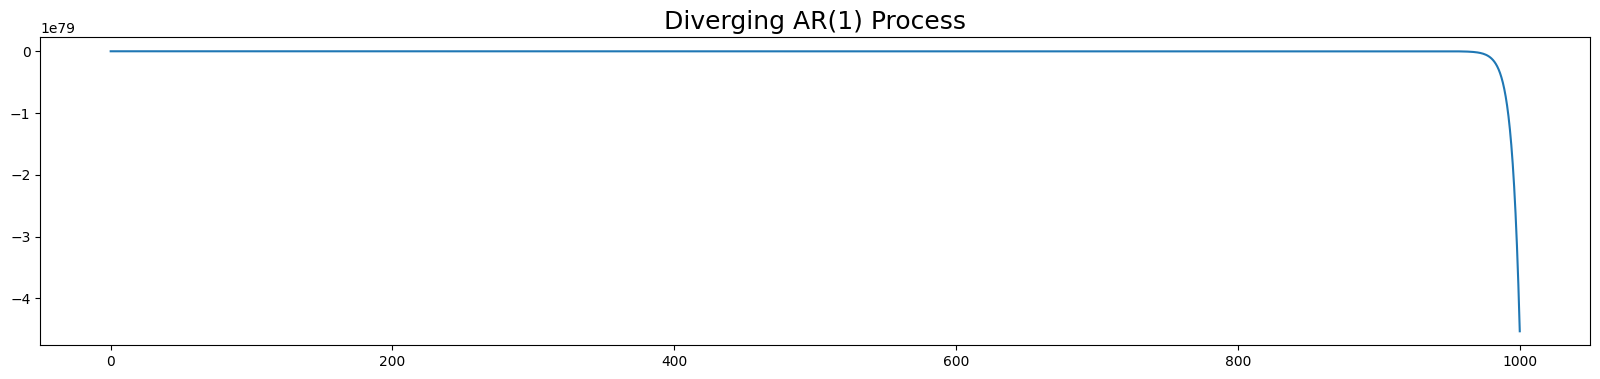

In [32]:
# non-Stationary (diverging) Process
# our coeffeicient here is > 1
ar_1_process_diverge = generate_ar_process(1, [1.2], 1000)
plt.figure(figsize=(20,4))
plt.plot(ar_1_process_diverge)
plt.title('Diverging AR(1) Process', fontsize=18)

In [41]:
perform_adf_test(ar_1_process_diverge)

ADF Statistic: 143707999985937376.000000
p-value: 1.000000
Statistically Insignificant. Process is Non-Stationary


Text(0.5, 1.0, 'Stationary AR(4) Process')

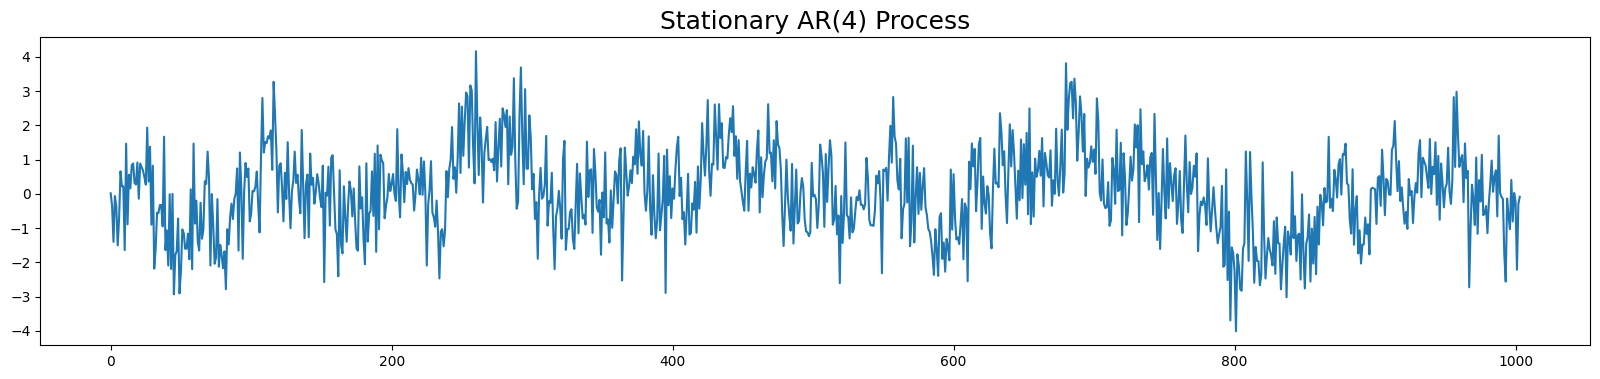

In [43]:
### AR(4) Processes (auto-regressive processes with a 1 time-period lag) ###

# Stationary Process
# because our coeffeicient sum to < 1, we know it will converge
ar_4_process = generate_ar_process(4, [0.20, 0.20, 0.20, 0.20], 1000)
plt.figure(figsize=(20,4))
plt.plot(ar_4_process)
plt.title('Stationary AR(4) Process', fontsize=18)

In [44]:
perform_adf_test(ar_4_process)

ADF Statistic: -6.745782
p-value: 0.000000
Statistically Significant. Process is Stationary


Text(0.5, 1.0, 'Non-Stationary AR(4) Process')

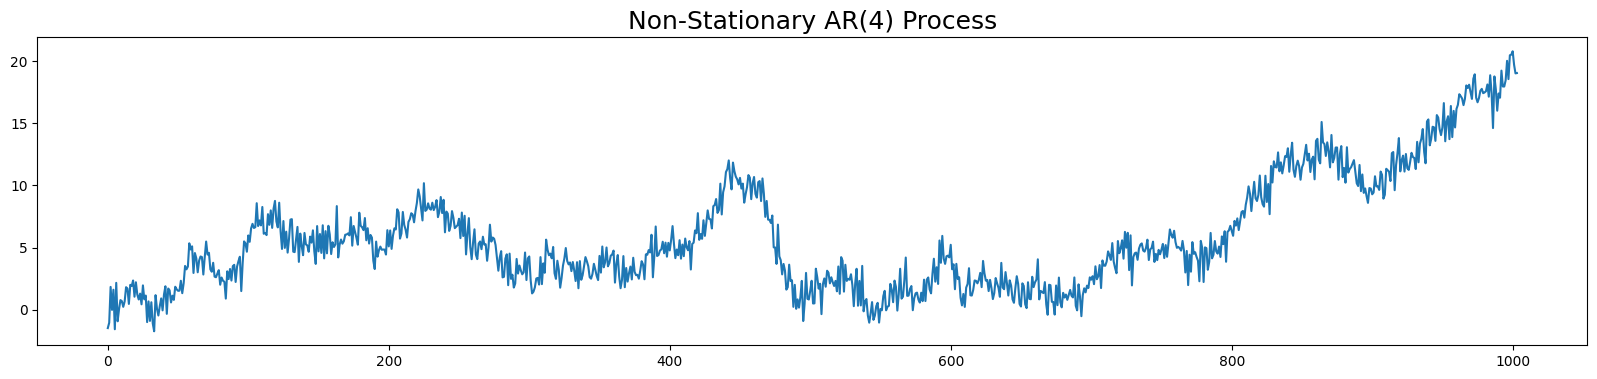

In [45]:
# Non-Stationary Process
# because our coeffeicient sum to == 1, we know there is a unit root
ar_4_process_unit_root = generate_ar_process(4, [0.25, 0.25, 0.25, 0.25], 1000)
plt.figure(figsize=(20,4))
plt.plot(ar_4_process_unit_root)
plt.title('Non-Stationary AR(4) Process', fontsize=18)

In [37]:
perform_adf_test(ar_4_process_unit_root)

ADF Statistic: -1.401212
p-value: 0.581695


Text(0.5, 1.0, 'Non-Stationary AR(4) Process')

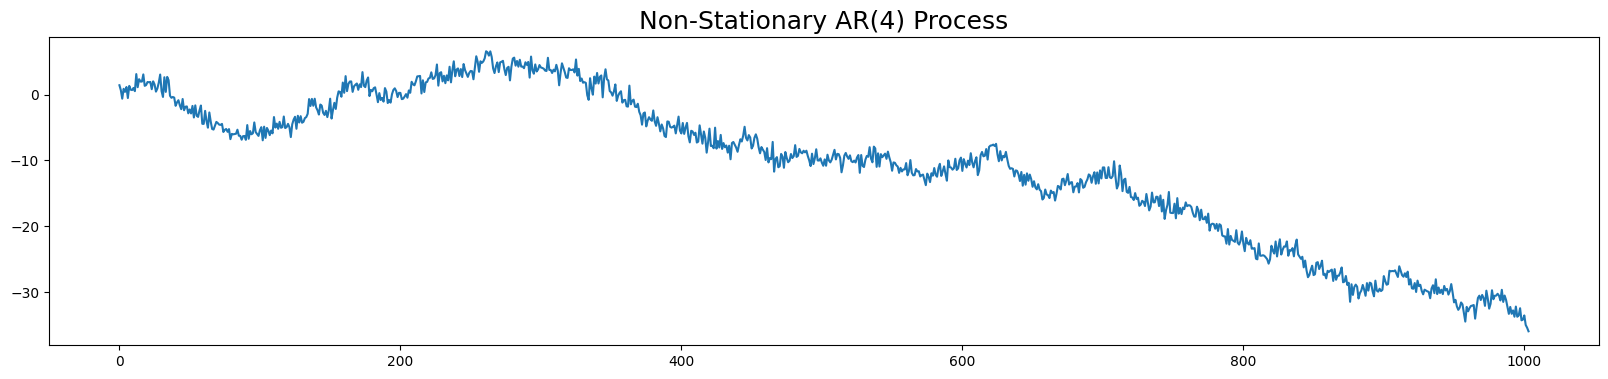

In [54]:
# Non-Stationary (Diverging) Process
# our coeffeicients sum to > 1
ar_4_process_diverge = generate_ar_process(4, [0.25, 0.25, 0.25, 0.258], 1000)
plt.figure(figsize=(20,4))
plt.plot(ar_4_process_diverge)
plt.title('Non-Stationary AR(4) Process', fontsize=18)

In [55]:
perform_adf_test(ar_4_process_diverge)

ADF Statistic: 1.100592
p-value: 0.995222
Statistically Insignificant. Process is Non-Stationary
